In [ ]:
import torch
import lib.utils.bookkeeping as bookkeeping
from torch.utils.data import DataLoader
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import lib.models.models as models
import lib.models.model_utils as model_utils
from lib.datasets import mnist, maze, protein, synthetic
import lib.datasets.dataset_utils as dataset_utils
import lib.losses.losses as losses
import lib.losses.losses_utils as losses_utils
import lib.training.training as training
import lib.training.training_utils as training_utils
import lib.optimizers.optimizers as optimizers
import lib.optimizers.optimizers_utils as optimizers_utils
import lib.sampling.sampling as sampling
import lib.sampling.sampling_utils as sampling_utils
import os
from lib.datasets.maze import maze_acc
from ruamel.yaml.scalarfloat import ScalarFloat
def count_turns(labyrinth):
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Rechts, Unten, Links, Oben
    num_turns = 0

    for i in range(1, labyrinth.shape[0] - 1):
        for j in range(1, labyrinth.shape[1] - 1):
            if labyrinth[i, j] == 1:
                valid_neighbors = 0
                for dx, dy in directions:
                    ni, nj = i + dx, j + dy
                    if labyrinth[ni, nj] == 1:
                        valid_neighbors += 1
                if valid_neighbors == 2:  # Zwei gültige Nachbarn bedeuten eine Richtungsänderung
                    num_turns += 1

    return num_turns

In [ ]:

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-30' # 2
config_name = 'config_001_bert.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_229999_bert.pt' 


path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-22' # 2
config_name = 'config_001_hollow8M.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_hollow8M.pt' 

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-22' # 2
config_name = 'config_001_hollow8M.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_hollow8M.pt' 

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-22' # 2
config_name = 'config_001_hollow8M.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_hollow8M.pt' 


path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-22' # 2
config_name = 'config_001_hollow8M.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_hollow8M.pt'

path = "SavedModels/Synthetic/"
date = '2023-12-20' # 2
config_name = 'config_001_hollowCEProb500K.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_hollowCEProb500K.pt'

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-01-05' # 2
config_name = 'config_001_hollowdirect.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_hollowdirect.pt' 

path = "SavedModels/SyntheticMasked/"
date = '2023-12-17' # 2
config_name = 'config_001_maskeddirect.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_maskeddirect.pt'

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-01-05' # 2
config_name = 'config_001_hollowdirect.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_hollowdirect.pt' 

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-28' # 2
config_name = 'config_001_hollowelbo.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_259999_hollowelbo.pt'

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-01-05' # 2
config_name = 'config_001_hollowdirect.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_hollowdirect.pt' 

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-22' # 2
config_name = 'config_001_hollow8M.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_hollow8M.pt' 

path = 'SavedModels/MAZEunet/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-30' # 2
config_name = 'config_001_lastunet.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_399999_lastunet.pt'

path = "SavedModels/Synthetic/"
date = '2023-12-20' # 2
config_name = 'config_001_hollowCEProb500K.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_hollowCEProb500K.pt'

path = 'SavedModels/MNIST/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-25' # 2
config_name = 'config_001_unet14Mlogits.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_599999_unet14Mlogits.pt'

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-22' # 2
config_name = 'config_001_hollow8M.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_hollow8M.pt' 

config_path = os.path.join(path, date, config_name)
checkpoint_path = os.path.join(path, date, model_name)


In [ ]:

import numpy as np
steps = [1000]
sampler_name = ['CRMTauL']#, 'CRMTauL']
data_list = []
for sampler_n_i in sampler_name:
    for i in range(9):
        print(f'hollow_{sampler_n_i}{1000}_mnist{i}.npy')
        data_list.append(np.load(f'hollow__direct_{sampler_n_i}{1000}_mnist{i}.npy'))


data = np.vstack(data_list)
print(data.shape)
np.save(f'Samples/MNIST/mnist_hollow_direct_{sampler_n_i}{1000}.npy', data)

In [ ]:
# creating models
cfg = bookkeeping.load_config(config_path)
cfg.sampler.name = 'CRMTauL' #ExactSampling' # ElboLBJF CRMTauL CRMLBJF
cfg.sampler.num_corrector_steps = 0
cfg.sampler.corrector_entry_time = ScalarFloat(0.0)
cfg.sampler.num_steps = 5
cfg.sampler.is_ordinal = True
#print(cfg)
device = torch.device(cfg.device)

model = model_utils.create_model(cfg, device)
model = model.float()
print("number of parameters: ", sum([p.numel() for p in model.parameters()]))

#modified_model_state = utils.remove_module_from_keys(loaded_state['model'])
#model.load_state_dict(modified_model_state)
#optimizer = optimizers_utils.get_optimizer(model.parameters(), cfg)
optimizer = torch.optim.Adam(model.parameters(), cfg.optimizer.lr)

#sampler = sampling_utils.get_sampler(cfg)

state = {"model": model, "optimizer": optimizer, "n_iter": 0}
state = bookkeeping.load_state(state, checkpoint_path)
state['model'].eval()


In [ ]:
n_samples = 2000
mjumps_rate = []
cfg.sampler.num_corrector_steps = 0
cfg.sampler.corrector_entry_time = ScalarFloat(0.2)
for name in ['ExactSampling']:
    cfg.sampler.name = name
    cfg.sampler.is_ordinal = True
    for step in [500]:
        cfg.sampler.num_steps = step
        for pc in [3, 5, 10]:
            cfg.sampler.num_corrector_steps = pc
            sampler = sampling_utils.get_sampler(cfg)
            samples, changes = sampler.sample(model, n_samples)
            mean_rej = np.mean(changes)
            mjumps_rate.append(mean_rej)
            print("mean multiple jumps", mean_rej)
            np.save(f'mazes_hollow_{cfg.sampler.name}{cfg.sampler.num_steps}_pc{cfg.sampler.num_corrector_steps}.npy', samples)
print(mjumps_rate)


In [ ]:
cfg.sampler.num_steps = 500
n_samples = 700 #cfg.data.batch_size 
sampler = sampling_utils.get_sampler(cfg)
samples, changes = sampler.sample(model, n_samples)
saved_samples = samples

In [ ]:
correct_mazes = maze_acc(saved_samples)

In [ ]:
cfg.data.name = 'Maze3SComplete'
cfg.data.batch_size = n_samples

if cfg.data.name == 'Maze3SComplete':
    limit = cfg.data.batch_size
    cfg.data.limit = limit 

dataset = dataset_utils.get_dataset(cfg, device)
dataloader = torch.utils.data.DataLoader(dataset,
    batch_size=cfg.data.batch_size,
    shuffle=cfg.data.shuffle)

for i in dataloader:
    true_dl = i
    c_i = maze_acc(i.cpu().numpy())
    true_dl = true_dl.reshape(cfg.data.batch_size, -1) #.flatten()

In [ ]:
samples = samples.reshape(cfg.data.batch_size, -1) #.flatten()
from scipy.stats import wasserstein_distance
emd_dist = []
print(samples.shape)
print(true_dl.shape)
for i in range(samples.shape[0]):
    m_g = samples[i, :]
    emd = wasserstein_distance(samples[i, :], true_dl[i, :].cpu().numpy())
    emd_dist.append(emd)
    #print(i, emd_dist)
#print("EMD", wasserstein_distance(samples, true_dl.cpu().numpy()))
#print("EMD", emd_dist)
print("AVG", np.mean(emd_dist))

# Hollow:
# LBJF: 0.0649
# TauL: 0.0675
# Exact: 0.644

# Hollow Direct:
# LBJF: 0.0688 0.6957
# TauL: 0.0687 (0.068733) 0.69

# Hollow ELBO
# LBJF: 0.07 (0.0689)
# TauL:
# Exact: 0.681

# Unet:
# tauL
# Exact


In [ ]:
steps = 1 / np.array([5, 10, 20, 30, 50, 100, 250, 500, 1000] )
acc_lbjf = np.array([9, 55, 75, 78, 82, 83, 84, 85, 86] ) / 100
acc_anal = np.array([16, 57, 76, 80, 82, 83, 84, 85, 85]) / 100
acc_taul = np.array([0, 3, 30, 50, 73, 80, 82, 84, 85]) / 100
# acc_taul_nonord = np.array([0, 0, 0.008, 0.01, 0.1, 0.36, 0.65, 78, 83, 85])
acc_taul_nonord = np.array([0, 0, 1, 10, 36, 65, 78, 83, 85]) / 100
mjumps_rate = np.array([0.372, 0.1662, 0.0732, 0.0434, 0.0243, 0.0115, 0.003, 0.00084])
#20: 0.07 30: 50: 0.0434, 0.024, 0.0

In [ ]:


steps_plot = np.round(1 / np.array([5, 10, 20, 50, 100, 250, 500, 1000] ), 3)
plt.plot(steps, acc_lbjf, label='Euler', marker='o') # 'o' für Kreise
plt.plot(steps, acc_anal, label='Analytical', marker='o')
plt.plot(steps, acc_taul_nonord, label='Tau-Leaping', marker='o')
#plt.gca().invert_xaxis()
plt.xlabel('$\\tau$', fontsize=13)
#plt.xlabel('NFE', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.title('Accuracy of Sampling Methods with Varying $\\tau$', fontsize=14)
plt.legend()
plt.grid(True)
#plt.yscale('log')
plt.xscale('log')
plt.xticks(steps_plot, steps_plot)
plt.savefig('accuracy_plot_tau_semilogx.pdf')
plt.show()



In [ ]:
steps = 1 / np.array([5, 6, 7, 8, 9, 10, 12, 15, 18, 20, 25, 30, 50, 100, 250, 500] )
mjumps_rate = [0.6085251628305858, 0.5494559409182388, 0.5024725555269348, 0.46047110249335016, 0.42721587669909056, 0.3971528976831892, 0.3485456803645144, 0.29737690992794547, 0.2594061472780591, 0.23819152995776705, 0.1982492844580715, 0.17059221048452358, 0.11267130391333513, 0.06186160933420365, 0.025205536736870884, 0.0069328674408784]
steps_plot = np.round(1 / np.array([5, 10, 20, 50, 100, 250, 500] ), 3)
#plt.gca().invert_xaxis()
plt.plot(steps, mjumps_rate, marker='o', color='black')
plt.ylabel('Average Rejection Rate', fontsize=13)
plt.xlabel('$\\tau$', fontsize=13)
plt.title('Average Rejection Rate of Tau-Leaping Scheme', fontsize=14)
plt.grid(True)
plt.xscale('log')
plt.xticks(steps_plot, steps_plot)
plt.savefig('rej_rate_plot.pdf')
plt.show()


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
steps_plot = np.round(1 / np.array([5, 10, 20, 50,100, 250, 500] ), 3)
steps = np.round( 1/ np.array([5, 6, 7, 8, 9, 10, 12, 15, 18, 20, 25, 30, 50, 100, 250, 500]), 3)
#[0.35877892914199944, 0.30981472686842804, 0.28292983201023614, 0.26155478599379806, 0.23674716318645556, 0.19564409941178987, 0.16951416165006652, 0.139516824660454, 0.13376598868398556, 0.09849632794965446]
#rej_rate_synthetic = np.array([0.24, 0.116, 0.075, 0.0554, 0.036, 0.021, 0.0094, 0.0019, 0.00039])
avg_ch_dim = np.array([0.40332350057517347, 0.3547955131536109, 0.31542669212748053, 0.28031873983265554, 0.25682451055878963, 0.22954889368547216, 0.19837796729464874, 0.16369641453630393, 0.13639601140774074, 0.12181723796934807, 0.09852055607115565, 0.08435660730246927, 0.048324176421086974, 0.024412986098583958, 0.007594022551450553, 0.003041762941834382]) 
#plt.gca().invert_xaxis()
plt.plot(steps, avg_ch_dim , marker='o', color='black')
plt.ylabel('Average Rejection Rate', fontsize=13)
plt.xlabel('$\\tau$', fontsize=13)
plt.title('Average Rejection Rate of Tau-Leaping Scheme', fontsize=14)
plt.grid(True)
plt.xscale('log')
plt.xticks(steps_plot, steps_plot)
plt.savefig('rej_rate_synthetic_tau_plot.pdf')
plt.show()


In [ ]:
"""
steps = np.array([5, 10,15, 20, 30, 50, 100, 250, 500]) 
change_taul_ord = np.array([0.3787, 0.2247, 0.1595, 0.1239, 0.0861, 0.0538, 0.02755, 0.0106, 0.0049])
clamp_taul_ord = np.array([0.238, 0.1153, 0.075, 0.0552 ,0.036,0.021, 0.00936,0.00192,0.000384])
change_taul_nonord = np.array([0.142, 0.11, 0.0840, 0.069, 0.05, 0.0324, 0.019, 0.0087,0.0045])
change_lbjf = np.array([0.42, 0.24, 0.168, 0.13, 0.0887, 0.055, 0.028, 0.0115, 0.0054])
change_exact = np.array([0.206, 0.137,0.1006,0.08, 0.0567, 0.0358, 0.0187,0.0077,0.0039])

plt.plot(steps, change_lbjf, label='Euler', marker='o') # 'o' für Kreise
plt.plot(steps, change_exact, label='Analytical', marker='o')
plt.plot(steps, change_taul_ord , label='Tau-Leaping', marker='o')
plt.plot(steps, change_taul_nonord , label='Tau-Leaping with Rejection', marker='o')
plt.ylabel('Avg. Proportion of Changing Dim', fontsize=13)
plt.xlabel('NFE', fontsize=13)
plt.title('Average Rejection Rate of Tau-Leaping Scheme', fontsize=14)
plt.grid(True)
plt.legend()
plt.xticks(steps_plot, steps_plot)
plt.show()
"""

In [ ]:
"""

change_taul_nonord_time = [0.0, 0.2691875100135803, 0.21253125369548798, 0.16771875321865082, 0.13959375023841858, 0.11800000816583633, 0.08646875619888306, 0.05946875363588333, 0.036781251430511475, 0.001500000013038516]
change_taul_ord_time = [1.0, 0.3410625159740448, 0.24518750607967377, 0.1925000101327896, 0.15309375524520874, 0.11903125792741776, 0.09334375709295273, 0.06428125500679016, 0.038750000298023224, 0.00043750001350417733]


steps = np.linspace(1, 0, len(change_taul_nonord_time))
plt.gca().invert_xaxis()
plt.plot(steps, change_taul_nonord_time, label='Tau-Leaping Rejection', color='purple')
plt.plot(steps, change_taul_ord_time, label='Tau-Leaping', color='green')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Avg. Proportion of Changing Dimensions', fontsize=13)
plt.legend()
plt.grid(True)
plt.title('Avg. Proportion of Changing Dimension')
#plt.savefig('PNGs/changing_dim_maze50_ordinal.png')
plt.show()
"""

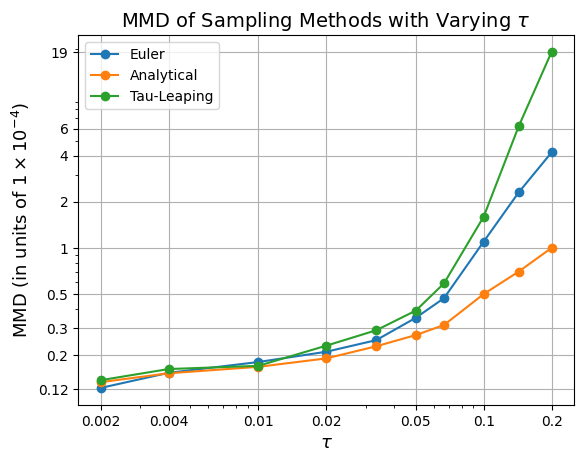

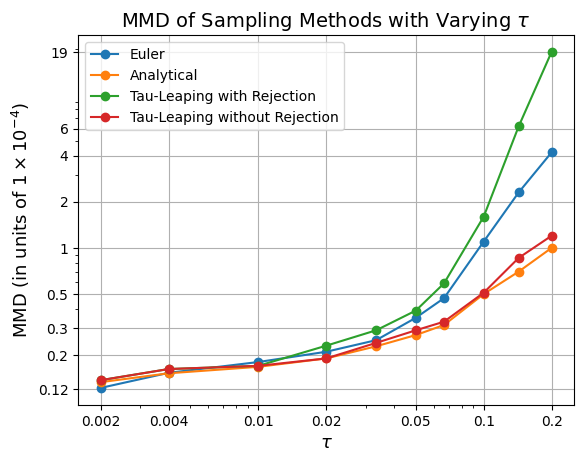

In [6]:
import numpy as np
import matplotlib.pyplot as plt

steps = 1 / np.array([5, 7, 10, 15, 20, 30, 50, 100, 250, 500])
steps_plot = np.round(1 / np.array([5, 10, 20, 50, 100, 250, 500]), 3)
steps_y = [19, 6, 4, 2, 1, 0.5, 0.3, 0.2, 0.12]

mmd_lbjf = np.array([4.2, 2.3, 1.1, 0.47 ,0.35, 0.25, 0.21, 0.18, 0.153, 0.122])
mmd_taul = np.array([19, 6.2, 1.6, 0.587, 0.39, 0.29, 0.23, 0.17, 0.162, 0.137])
mmd_exact = np.array([1.0, 0.7, 0.5, 0.314, 0.27, 0.228, 0.19, 0.1675, 0.152, 0.133])
plt.plot(steps, mmd_lbjf , label='Euler', marker='o') # 'o' für Kreise
plt.plot(steps, mmd_exact, label='Analytical', marker='o')
plt.plot(steps, mmd_taul, label='Tau-Leaping', marker='o')
plt.xlabel('$\\tau$', fontsize=13)
plt.ylabel('MMD (in units of $1\\times 10^{-4}$)', fontsize=13) 
plt.title('MMD of Sampling Methods with Varying $\\tau$', fontsize=14)
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xticks(steps_plot, steps_plot)
plt.yticks(steps_y, steps_y)
plt.savefig('mmd_plot_tau.pdf')
plt.show()


mmd_lbjf = np.array([4.2, 2.3, 1.1, 0.47 ,0.35, 0.25, 0.21, 0.18, 0.153, 0.122])
mmd_taul = np.array([19, 6.2, 1.6, 0.587, 0.39, 0.29, 0.23, 0.17, 0.162, 0.137])
mmd_exact = np.array([1.0, 0.7, 0.5, 0.314, 0.27, 0.228, 0.19, 0.1675, 0.152, 0.133])
mmd_taul_wo = np.array([1.2, 0.86, 0.51, 0.33, 0.29, 0.24, 0.19, 0.17, 0.162, 0.137])

plt.plot(steps, mmd_lbjf , label='Euler', marker='o') # 'o' für Kreise
plt.plot(steps, mmd_exact, label='Analytical', marker='o')
plt.plot(steps, mmd_taul, label='Tau-Leaping with Rejection', marker='o')
plt.plot(steps, mmd_taul_wo, label='Tau-Leaping without Rejection', marker='o')
plt.xlabel('$\\tau$', fontsize=13)
plt.ylabel('MMD (in units of $1\\times 10^{-4}$)', fontsize=13) 
plt.title('MMD of Sampling Methods with Varying $\\tau$', fontsize=14)
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xticks(steps_plot, steps_plot)
plt.yticks(steps_y, steps_y)
plt.savefig('mmd_plot_first20_worejection_tau.pdf')
plt.show()

In [ ]:
import numpy as np
steps = [750]
corrector = 10
sampler_name = ['TauL']# , CRMTauL']
for sampler_n_i in sampler_name:
    for step in steps:
        data_list = []
        for i in range(3):
            print(f'mnist_unet_corrector{corrector}_{sampler_n_i}{step}_mnist{i}.npy')
            data_list.append(np.load(f'mnist_unet_corrector{corrector}_01_{sampler_n_i}{step}_mnist{i}.npy'))
        data = np.vstack(data_list)
        print(data.shape)
        np.save(f'Samples/MNIST/mnist_unet_corrector{corrector}_01_{sampler_n_i}{step}.npy', data)
        

In [ ]:
import numpy as np
max_t = 0.99999
min_t = 0.01
num_steps = [50, 100, 250, 500, 750, 1000]
nfe_10_01 = []
for steps in num_steps:
    ts = np.concatenate(
        (np.
        linspace(max_t, min_t, steps), np.array([0]))
    )
    print(len(ts))
    k = 0 
    for i, t in (enumerate(ts[0:-1])):
        print(i+1)
        if t <= 0.1:
            for j in range(5):
                k += 1
                print(k)
    print(i)
    print(i+k)
    nfe_10_01.append(i+k)
print(nfe_10_01)

In [ ]:
# nfe plot
nfe_1_01 = [54, 109, 272, 545, 818, 1000] # 1090 last
nfe_1_01_fid = [13.172119479843474, 2.593958846497685, 2.3124636154390714,  2.2955929208740997, 2.268975460098858, 2.2571159746989906]
nfe_3_01 = [64, 129, 318, 637, 1000, 1272] # vorletzes 956
nfe_3_01_fid = [12.544362618674569, 2.653572526721007, 2.30941289542929, 2.276187915395326, 2.2539787186312788, 2.2466063307386435]
nfe_5_01 = [74, 149, 364, 729, 1000, 1500] #vorletztes 1094 letztes 15000
nfe_5_01_fid = [12.58564395129946, 2.538496664948809, 2.3170141451028314, 2.2559381898192896, 2.2450412804101074, 2.2267139529323856]
nfe_10_01 = [99, 199, 479, 1000, 1500] # vorletztes # 959 letztes 1439
nfe_10_01_fid = [11.713824326294798, 2.4731209322140444, 2.3148737019269277, 2.3065898535350584, 3.195595756357534]
nfe_mpl = [40, 100, 500, 1000, 1500]
nfe_taul = [50, 100, 250, 500, 750, 1000, 1500]




mean_c1 = [7.685214153332941, 8.647939466433439, 8.755318814855267, 8.728635327016125, 8.769999551759987, 8.776702214194092]
std_c1 = [0.10020794506473688, 0.12287807651939232, 0.08248251060547318, 0.08304519492126802, 0.06759433319038019, 0.12659895249777367]

mean_c3 = [7.762886743437322, 8.596458341030935, 8.798446691296359, 8.751792345723775, 8.76805730506273, 8.74081231601401]
std_c3 = [0.11598291894202396, 0.09363631101316408, 0.10748087401514818, 0.09812815045935029, 0.05775935607353134, 0.09677611504981143]

mean_c5 = [7.665914862629701, 8.659614704761324, 8.795426848297684, 8.721246193397805, 8.74803374634143, 8.744422635144518]
std_c5 = [0.10402757843947735, 0.09600572858682611, 0.062457741056709454, 0.07043536838850206, 0.10784576786370587, 0.09917689867200492]

mean_c10 = [7.737014645693776, 8.671485752113487, 8.78130387956802, 8.763744669389167, 8.662650644054375]
std_c10 = [0.09972477960311658, 0.08709899412509303, 0.0974413469033469, 0.0987803915058357, 0.10316599969779615]